Initial Exploration of Age and Gender Features
==============================================

This notebook serves as an initial exploration of machine learning techniques against the Titanic dataset. To keep things very simple, we focus on two features of the data: age and sex of passenger. Given that the sex / gender is already created as an example submission, we can use that to confirm validation methodologies.

In [67]:
# set up code and dataframe with training data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    KFold

df = pd.read_csv("../data/kaggle/train.csv")
print(df.shape)

(891, 12)


In [68]:
# set up the X, y values for the train and test sets
x1_col_name, x2_col_name, y_col_name = 'Sex', 'Age', 'Survived'

# for the first exploration, we want to focus on gender, so we set the variable to X1
X1_ = df[[ x1_col_name ]]
y = df[ y_col_name ].values

# because the sex / gender data is categorical ['male', 'female'], then we need
# to convert it to ordinal numbers; this could also be done with an apply function,
# I'm choosing to use the preprocessing encoder here as a learning opportunity
enc = preprocessing.OrdinalEncoder()
X = enc.fit_transform(X1_)

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y, \
                                     test_size=0.2, random_state=1)

clf = svm.SVC( kernel='linear', C=1 ).fit( X_train, y_train )
clf.score(X_test, y_test)

0.776536312849162

In [70]:
# transform the dataframe, so that it can be properly graphed as a bar plot
df_group_count = df.groupby([x1_col_name, y_col_name])[x1_col_name].count()
df_grouped = df_group_count.unstack(y_col_name)

print(df_group_count)
print()
print(df_grouped)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

Survived    0    1
Sex               
female     81  233
male      468  109


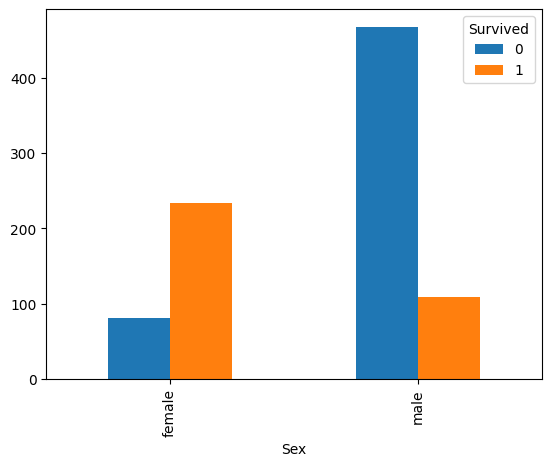

In [71]:
df_grouped.plot(kind='bar')
plt.show()

In [72]:
age_val_count = df[[x2_col_name]].count()
age_nan_count = df[[x2_col_name]].isna().sum()
print(f"Value count: {age_val_count.values[0]}")
print(f"NAN count:   {age_nan_count.values[0]}")

Value count: 714
NAN count:   177


In [73]:
df_copy = df.copy()

replace_val = -50

#df_copy[col_name].fillna(value=replace_val, inplace=True)
df_copy.dropna(subset=[x2_col_name], inplace=True)
df_sub = df_copy[[y_col_name, x1_col_name, x2_col_name]]

In [74]:
def get_hist_survived( df, num_bins ):

    df_surv = df[ df[ y_col_name ] == 0 ].pivot(columns='Survived', values='Age')
    df_nsrv = df[ df[ y_col_name ] == 1 ].pivot(columns='Survived', values='Age')

    counts, bins, patches = plt.hist([df_surv[0], df_nsrv[1]], bins=num_bins)

    return counts, bins, patches


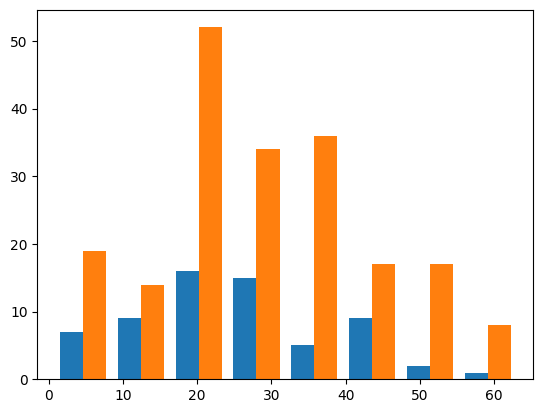

In [77]:
df_male = df_sub[ df_sub[ x1_col_name ] == "male" ]
df_female = df_sub[ df_sub[ x1_col_name ] == "female" ]

num_bins=8
counts, bins, patchs = get_hist_survived( df_female, num_bins )
plt.show()

In [76]:
min_age = int(df_sub['Age'].min())
max_age = int(df_sub['Age'].max())

step = (max_age-min_age)/num_bins
age_array = np.linspace(min_age, max_age, num_bins+1)

df_age_count_survived = counts[0]
df_age_count_notsurvived = counts[1]

#df_age_count_totals = df_age_count_survived + df_age_count_notsurvived

df_age_counts = pd.DataFrame(counts)
print(df_age_counts.T)

#print(age_array)
#print(df_age_count_totals)
#print(bins)

       0     1
0   14.0  19.0
1   59.0  10.0
2  126.0  23.0
3   77.0  23.0
4   43.0  12.0
5   24.0   4.0
6   13.0   1.0
7    4.0   1.0
